#### Articulation Points (or Cut Vertices) in a Graph

A vertex v is an articulation point (also called cut vertex) if removing v increases the number of connected components.

Articulation points represent vulnerabilities in a connected network – single points whose failure would split the network into 2 or more components. They are useful for designing reliable networks.

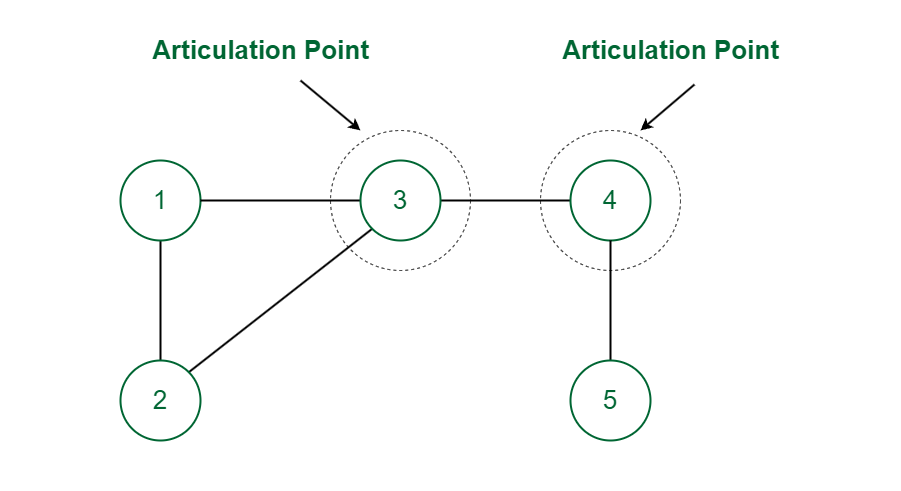

In [1]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Connectivity/img/articulation.png")

In the above graph vertex 3 and 4 are Articulation Points since the removal of vertex 3 (or 4) along with its associated edges makes the graph disconnected.

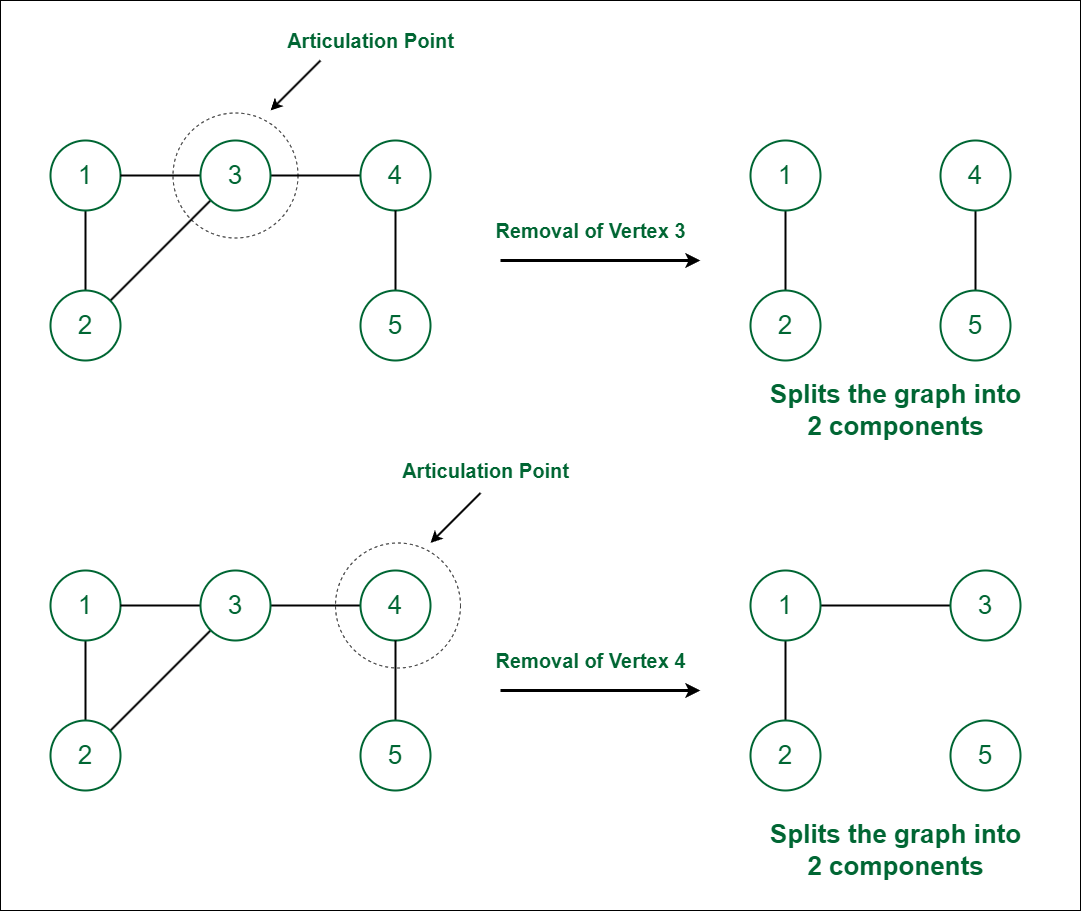

In [2]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Connectivity/img/rem_finaldrawio.png")

#### Naive approach to find Articulation Points (or Cut Vertices) in a Graph:

A simple approach is to one by one remove all vertices and see if removal of a vertex causes disconnected graph.

Following the below steps to Implement the idea:

1. Iterate over all the vertices and for every vertex do the following:
    - Remove v from graph
    - See if the graph remains connected (We can either use BFS or DFS) 
    - Add v back to the graph

In [1]:

def dfs(adj, V, vis, i, curr):
    vis[curr] = 1
    for x in adj[curr]:
        if x != i and not vis[x]:
            dfs(adj, V, vis, i, x)

def AP(adj, V):
    for i in range(1, V + 1):
        components = 0
        vis = [0] * (V + 1)
        for j in range(1, V + 1):
            if j != i:
                if not vis[j]:
                    components += 1
                    dfs(adj, V, vis, i, j)

        if components > 1:
            print(i)

def addEdge(adj, u, v):
    adj[u].append(v)
    adj[v].append(u)

if __name__ == "__main__":
    print("Articulation points in the graph")
    V = 5
    adj1 = [[] for _ in range(V + 1)]
    addEdge(adj1, 1, 2)
    addEdge(adj1, 2, 3)
    addEdge(adj1, 1, 3)
    addEdge(adj1, 3, 4)
    addEdge(adj1, 4, 5)
    AP(adj1, V)

Articulation points in the graph
3
4


#### Time Complexity: 

O(V*(V+E)) for a graph represented using an adjacency list.

#### Auxiliary Space: O(V+E)

#### Finding Articulation Points (or Cut Vertices) in a Graph using Tarjan’s Algorithm:

The idea is to use DFS (Depth First Search). In DFS, follow vertices in a tree form called the DFS tree. In the DFS tree, a vertex u is the parent of another vertex v, if v is discovered by u. 

In DFS tree, a vertex u is an articulation point if one of the following two conditions is true. 

- u is the root of the DFS tree and it has at least two children. 
- u is not the root of the DFS tree and it has a child v such that no vertex in the subtree rooted with v has a back edge to one of the ancestors in DFS tree of u.

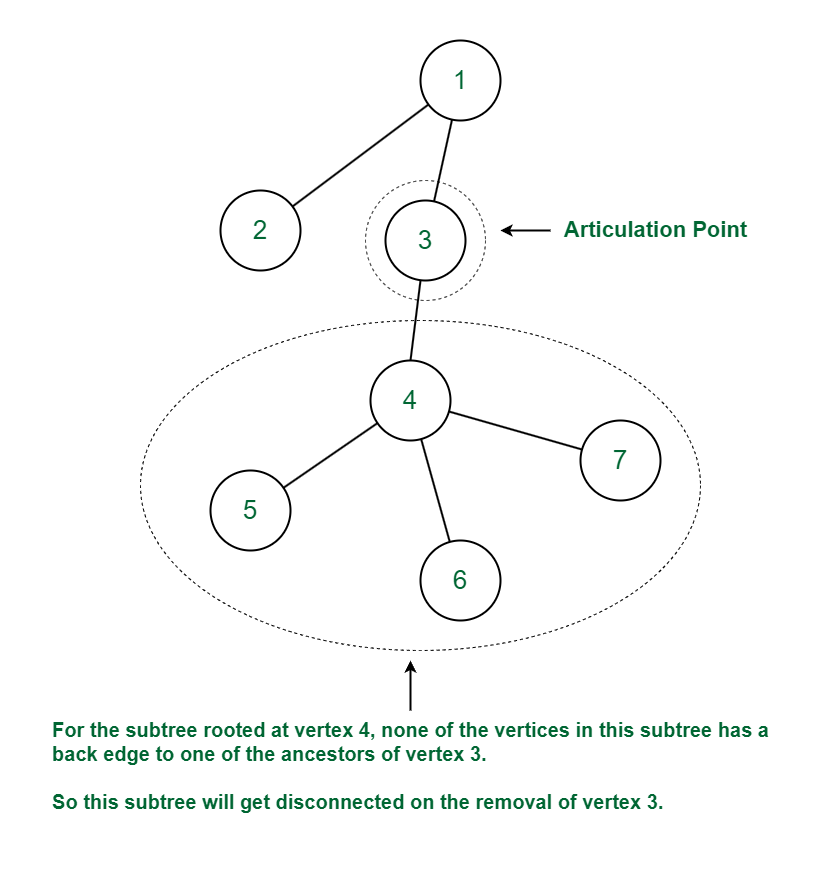

In [5]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Connectivity/img/example-1drawio.png")

For the vertex 3 (which is not the root), vertex 4 is the child of vertex 3. No vertex in the subtree rooted at vertex 4 has a back edge to one of ancestors of vertex 3. Thus on removal of vertex 3 and its associated edges the graph will get disconnected or the number of components in the graph will increase as the subtree rooted at vertex 4 will form a separate component. Hence vertex 3 is an articulation point.

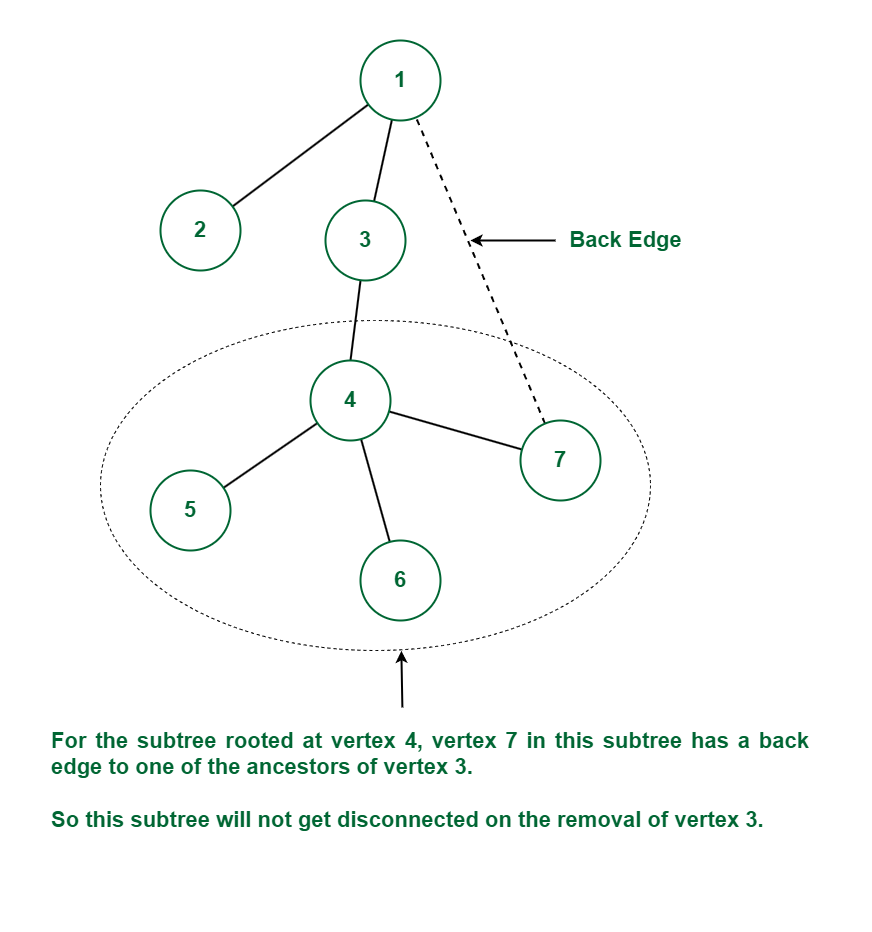

In [3]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Connectivity/img/example-1drawio2.png")

Again the vertex 4 is the child of vertex 3. For the subtree rooted at vertex 4, vertex 7 in this subtree has a back edge to one of the ancestors of vertex 3 (which is vertex 1). Thus this subtree will not get disconnected on the removal of vertex 3 because of this back edge. Since there is no child v of vertex 3, such that subtree rooted at vertex v does not have a back edge to one of the ancestors of vertex 3. Hence vertex 3 is not an articulation point in this case.

Follow the below steps to Implement the idea:

- Do DFS traversal of the given graph 

    - In DFS traversal, maintain a parent[] array where parent[u] stores the parent of vertex u.

    - To check if u is the root of the DFS tree and it has at least two children. For every vertex, count children. If the currently visited vertex u is root (parent[u] is NULL) and has more than two children, print it. 

    - To handle a second case where u is not the root of the DFS tree and it has a child v such that no vertex in the subtree rooted with v has a back edge to one of the ancestors in DFS tree of u maintain an array disc[] to store the discovery time of vertices.
    
    - For every node u, find out the earliest visited vertex (the vertex with minimum discovery time) that can be reached from the subtree rooted with u. So we maintain an additional array low[] such that: 
    
        - low[u] = min(disc[u], disc[w]) , Here w is an ancestor of u and there is a back edge from some descendant of u to w.

In [8]:
from collections import defaultdict

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = defaultdict(list)
        self.Time = 0
 
    def addEdge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)

    def APUtil(self, u, visited, ap, parent, low, disc):
        children = 0
        visited[u]= True
        disc[u] = self.Time
        low[u] = self.Time
        self.Time += 1
        for v in self.graph[u]:
            if visited[v] == False :
                parent[v] = u
                children += 1
                self.APUtil(v, visited, ap, parent, low, disc)
                low[u] = min(low[u], low[v])
                if parent[u] == -1 and children > 1:
                    ap[u] = True

                if parent[u] != -1 and low[v] >= disc[u]:
                    ap[u] = True    
                    
            elif v != parent[u]: 
                low[u] = min(low[u], disc[v])

    def AP(self):
        visited = [False] * (self.V)
        disc = [float("Inf")] * (self.V)
        low = [float("Inf")] * (self.V)
        parent = [-1] * (self.V)
        ap = [False] * (self.V)

        for i in range(self.V):
            if visited[i] == False:
                self.APUtil(i, visited, ap, parent, low, disc)

        for index, value in enumerate (ap):
            if value == True: print (index,end=" ")

g1 = Graph(5)
g1.addEdge(1, 0)
g1.addEdge(0, 2)
g1.addEdge(2, 1)
g1.addEdge(0, 3)
g1.addEdge(3, 4)
 
print ("\nArticulation points in first graph ")
g1.AP()

g2 = Graph(4)
g2.addEdge(0, 1)
g2.addEdge(1, 2)
g2.addEdge(2, 3)
print ("\nArticulation points in second graph ")
g2.AP()

g3 = Graph (7)
g3.addEdge(0, 1)
g3.addEdge(1, 2)
g3.addEdge(2, 0)
g3.addEdge(1, 3)
g3.addEdge(1, 4)
g3.addEdge(1, 6)
g3.addEdge(3, 5)
g3.addEdge(4, 5)
print ("\nArticulation points in third graph ")
g3.AP()


Articulation points in first graph 
0 3 
Articulation points in second graph 
1 2 
Articulation points in third graph 
1 

#### Time Complexity: O(V+E)

For DFS it takes O(V+E) time.

#### Auxiliary Space: O(V+E)

For visited array, adjacency list array. 